<a href="https://colab.research.google.com/github/Amanpatni211/Population_Forecasting/blob/main/population_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1033120080 aman patni
#here we are going to forecast the population of any given city from different mathematical 
#methods
#we will keep it general
import pandas as pd

In [ ]:
n = int(input("how many data points are there:?"))          #n is the number of items you want to enter
d ={}                     
for i in range(n):        
    text = input("enter in year:population format").split(':')     #split the input text based on space & store in the list 'text'
    d[int(text[0])] = int(text[1])       #assign the 1st item to key and 2nd item to value of the dictionary
data = pd.DataFrame([d])
print(data)


how many data points are there:?6
enter in year:population format1:159000
enter in year:population format2:303000
enter in year:population format3:568000
enter in year:population format4:869000
enter in year:population format5:1170000
enter in year:population format6:1558000
        1       2       3       4        5        6
0  159000  303000  568000  869000  1170000  1558000


In [ ]:
print(data)

        1       2       3       4        5        6
0  159000  303000  568000  869000  1170000  1558000


In [ ]:
data.iloc[0,1]

303000

In [ ]:
len(data.columns)

6

In [ ]:
# Arthimatic Increase Method
# here we find the average change in population every year and hence use that value as the increment in the upcoming years
def average(a):
  return sum(a)/len(a)
def AIP(y): #y is the numbers of years ahead of present time for the forcast 
  h = []
  for i in range(n-1):
    a = data.iloc[0,i+1]-data.iloc[0,i]
    h.append(a)
  Avg_increment = average(h)
  
  p = data.iloc[0,n-1] + y*Avg_increment
  return p

In [ ]:
AIP(20)

7154000.0

In [ ]:
#Geometrical Increase Method/Geometrical Progression Method
#It uses the same idea as compound interest in finance
def GIM(y):
  ''' here Pn = the population after n years from the present
           p0 = the population at the end of last known census
           r = average growth rate
           '''
  rates = []
  for i in range(n-1):
    a = data.iloc[0,i+1]-data.iloc[0,i]
    r = a/data.iloc[0,i] *100
    
    rates.append(r)
  Avg_growth_rate= average(rates)
  Pn = data.iloc[0,n-1]*((1+(r/100))**y)
  return Pn

In [ ]:
GIM(4)

4898846.366573347

#Incremental Increase Method

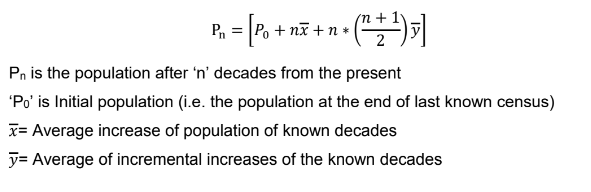

In [ ]:
def IIM(k):
# k is the the number of years ahead
#this is a upgraded version of AIM ,so we will use that learning here
  incremental_increase = []
  h = []
  for i in range(n-1):
    a = data.iloc[0,i+1]-data.iloc[0,i]
    h.append(a)
  for i in range(0,n-2):
    b = h[i+1]-h[i]
    incremental_increase.append(b)
  Avg_incremental_increase = average(incremental_increase)
  #Pn = AIM + k*((k+1)/2)*Avg_incremental_increase
  s =k*((k+1)/2)*Avg_incremental_increase
  print(s)
  Pn =float(AIP(k)) +k*((k+1)/2)*Avg_incremental_increase
  return Pn


In [ ]:
IIM(2)

183000.0


2300600.0

#ideal population Growth Curve (Logistic Curve)

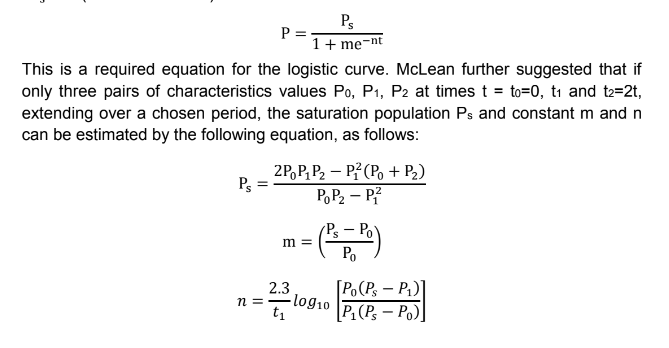

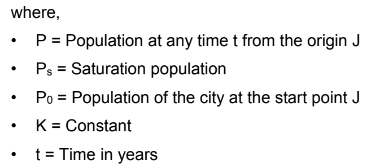

In [ ]:
import math

#so this is a bit intense
#we will get p0,p1,p2,ps,m,k(which is n above),t1,p
def Logistic_curve():
  '''
incase of odd number of data points;we easily have p0,p1,p2
p0 is initial population
p1 is at (n+1)/2 position
p2 is last position
incase of even data points
p0,p2 remains same
p1 is average of mid values and time is also avg of their respective midvalues
'''
  n= len(data.columns)
  p0 = data.iloc[0,0]
  p2=data.iloc[0,n-1]
  if n//2 ==1 :
    p1 = data.iloc[0,int((n-1)/2)]
    t1= ((n-1)*10)/2
  else:
    p1 = (data.iloc[0,int(n/2)]+data.iloc[0,int((n/2)-1)])/2
    t1= ((n-1)*10)/2
  print(p0,p1,p2)
  ps = ((2*p0*p1*p2)-(p1**2)*(p0+p2))/((p0*p2)-(p1**2))
  print(ps)

  m=(ps-p0)/p0
  print(m)
  n=(2.3/t1)*(math.log((p0*(ps-p1))/(p1*(ps-p0)),10))
  print(n)
  print(t1)
  p= (ps)/(1+m*(math.exp(-n*t1)))
  return p

In [ ]:
Logistic_curve()

159000 718500.0 1558000
1975312.5853636737
11.423349593482225
-0.07497537418538837
25.0


26182.587014431065

In [ ]:
def all_models(q):
  print("AIM is  " + str(AIP(q)))
  print("GIM is  " + str(GIM(q)))
  print("IIM is  " + str(IIM(q)))
  print("p0,p1,p2,ps,m,n,t1,SATURATION POPULATION  " + str(Logistic_curve()))
   


In [ ]:
all_models(1)

AIM is  1181673.5
GIM is  1117756.6309991411
-200051.0
IIM is  981622.5
387224 752066 916857
966794.1803751312
1.496731040367155
-0.16548745566587159
10.0
p0,p1,p2,ps,m,n,t1,SATURATION POPULATION  109470.73789007317


In [ ]:
all_models(2)

AIM is  2117600.0
GIM is  2762680.336036233
183000.0
IIM is  2300600.0
159000 718500.0 1558000
1975312.5853636737
11.423349593482225
-0.07497537418538837
25.0
p0,p1,p2,ps,m,n,t1,SATURATION POPULATION  26182.587014431065


In [ ]:
all_models(3)

AIM is  2397400.0
GIM is  3678851.250892693
366000.0
IIM is  2763400.0
159000 718500.0 1558000
1975312.5853636737
11.423349593482225
-0.07497537418538837
25.0
p0,p1,p2,ps,m,n,t1,SATURATION POPULATION  26182.587014431065
